# Project 1_Simple Linear Regression (TV Sales)

In [12]:
# Understanding the Dataset
import pandas as pd
advertising = pd.read_csv(r"C:\Users\royim\OneDrive\Desktop\Udemy Courses_Practice\Kaggle Master\Project 1_Simple Linear Regression\code_LR_Teclov\tvmarketing.csv")
advertising.head()
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [13]:
#Checking the columns
advertising.info()
#Shape of the Dataframe
advertising.shape
#Satistical Information
advertising.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


## Visualizing Data Using Seaborn

In [14]:
# Conventional Way to import seaborn
import seaborn as sns

# To visualize in the Notebook
%matplotlib inline

## Performing Simple Linear Regression

C:\Users\royim\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


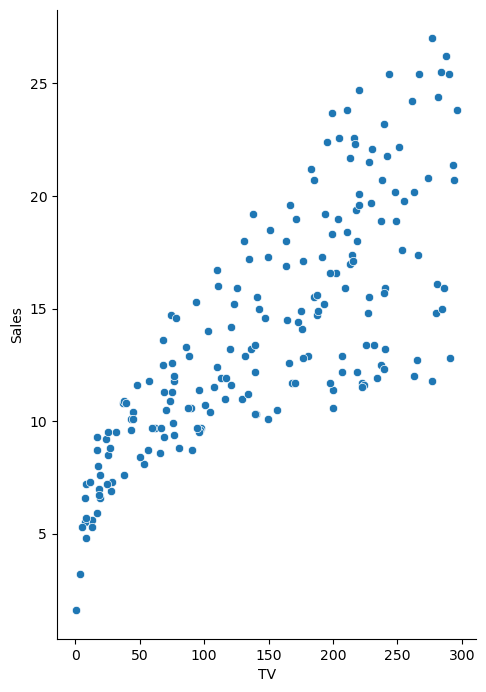

In [15]:
# Visualize the relationship b/w the feature and the response using scatterplots
sns.pairplot(advertising, x_vars=['TV'], y_vars='Sales', height=7, aspect=0.7, kind='scatter')

## Preparing X and y
* The scikit-learn library expects X (feature variable - TV) and y (response variable - Sales) to be NumPy arrays
* However, X can be a dataframe as Pandas is built over NumPy

In [16]:
# Putting feature variable to X
X = advertising['TV']
# Putting response variable to y
y = advertising['Sales']

## Splitting Data into Training and Testing Sets

In [17]:
# random_state is the seed used by the random number generator, it can be any integer
#from sklearn.cross_validation import train_test_split # Not working
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

* It is general convention in scikit-learn that observations are "Rows", while features are columns
* This is needed only when you are using single feature; in this case 'TV'

In [18]:
# Shape is one dimentional
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140,)
(60,)
(140,)
(60,)


In [19]:
import numpy as np
#X_train = X_train[:, np.newaxis] # Not working
X_train = X_train.values.reshape(-1, 1)  # Reshape as 2D array
#X_test = X_test[:, np.newaxis] # Not working
X_test = X_test.values.reshape(-1, 1) # Reshape as 2D array

In [20]:
# Now it will become 2 dimentional
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 1)
(60, 1)
(140,)
(60,)


## Performing Linear Regression

In [21]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr (Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

## Coefficient Calcualtion

In [24]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

6.989665857411679
[0.04649736]


## Predictions

In [25]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

In [26]:
type(y_pred)

numpy.ndarray

## Computing RMSE and R^2 Values

Text(0, 0.5, 'Sales')

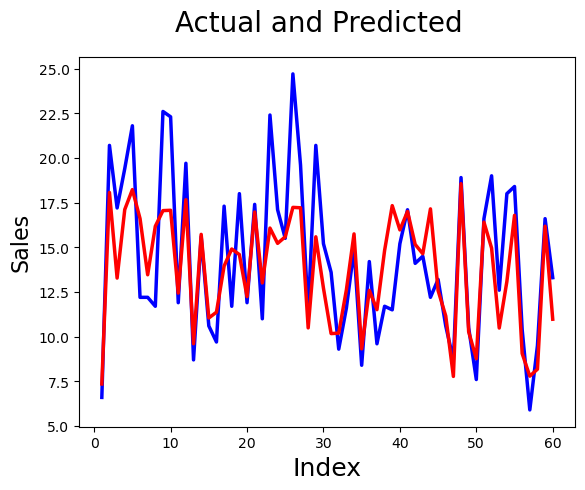

In [33]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1, 61, 1)] # Generating index
fig = plt.figure()
plt.plot(c, y_test, color = 'blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred, color = 'red', linewidth=2.5, linestyle='-')
fig.suptitle('Actual and Predicted', fontsize=20) # Plot heading
plt.xlabel('Index', fontsize=18)
plt.ylabel('Sales', fontsize=16)

## Error Terms

Text(0, 0.5, 'yTest-yPred')

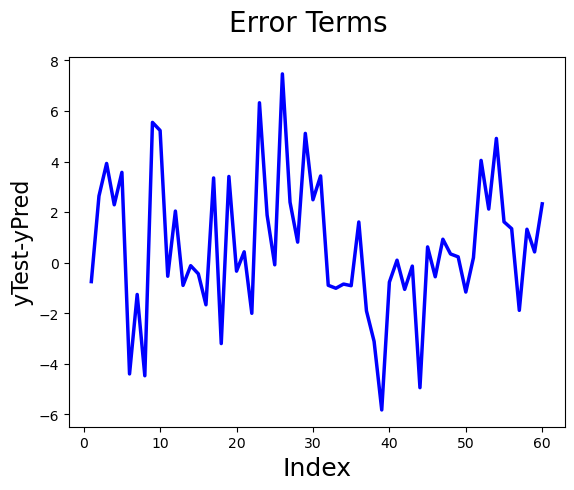

In [39]:
# Error Terms
import matplotlib.pyplot as plt
c = [i for i in range(1, 61, 1)] # Generating index
fig = plt.figure()
plt.plot(c, y_test-y_pred, color = 'blue', linewidth=2.5, linestyle='-')
fig.suptitle('Error Terms', fontsize=20) # Plot heading
plt.xlabel('Index', fontsize=18)
plt.ylabel('yTest-yPred', fontsize=16)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [43]:
r_squared = r2_score(y_test,y_pred)

In [44]:
print('Mean_Squared_Error: ', mse)
print('r_square_value: ', r_squared)

Mean_Squared_Error:  7.97579853285485
r_square_value:  0.5942987267783302


In [ ]:
# Mean_Squared_Error:  7.9 # Meaning our model is not able to predict correctly 7.9%
# r_square_value: 0.59     # Meaning in real life data if R^2 value is 60 and above, it is a good model

Text(0, 0.5, 'Predicted Y')

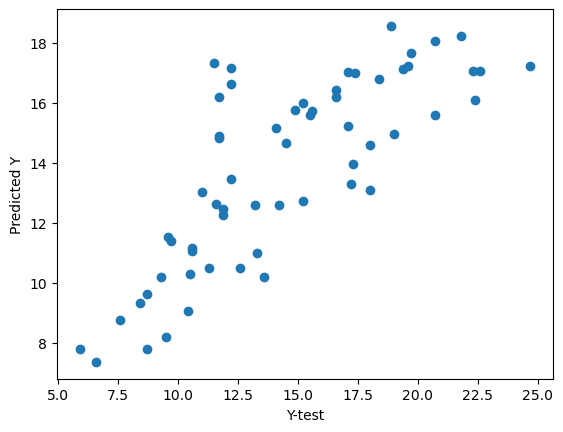

In [45]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Y-test')
plt.ylabel('Predicted Y')